# 2022 Store Sales Forecasting Kaggle Competition

### Time series modelling foundations

In [1]:
%run "C:\Users\James\Documents\Kaggle\Store Sales\Cleaning and Merging_updated.ipynb".ipynb

0 0 14
3000888
3000888
3000888
date          0
oil_price    43
dtype: int64
            date  oil_price
0     2013-01-01        NaN
1     2013-01-02      93.14
2     2013-01-03      92.97
3     2013-01-04      93.12
4     2013-01-07      93.20
...          ...        ...
1213  2017-08-25      47.65
1214  2017-08-28      46.40
1215  2017-08-29      46.46
1216  2017-08-30      45.96
1217  2017-08-31      47.26

[1218 rows x 2 columns]
date         0
oil_price    1
dtype: int64
            date  oil_price
0     2013-01-01        NaN
1     2013-01-02      93.14
2     2013-01-03      92.97
3     2013-01-04      93.12
4     2013-01-07      93.20
...          ...        ...
1213  2017-08-25      47.65
1214  2017-08-28      46.40
1215  2017-08-29      46.46
1216  2017-08-30      45.96
1217  2017-08-31      47.26

[1218 rows x 2 columns]
            date  oil_price
1     2013-01-02      93.14
2     2013-01-03      92.97
3     2013-01-04      93.12
4     2013-01-07      93.20
5     2013-01-08   

In [2]:
train_complete_merge.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day,sales_to_promo_ratio,...,holiday_national_binary,holiday_regional_binary,holiday_local_binary,earthquake_binary,world_cup_binary,christmas_binary,dayofwk,flag_1st,flag_lastday,flag_15th
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,NaN,...,1,0,0,0,0,0,1,1,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,NaN,...,1,0,0,0,0,0,1,1,0,0
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,NaN,...,1,0,0,0,0,0,1,1,0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,NaN,...,1,0,0,0,0,0,1,1,0,0
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,NaN,...,1,0,0,0,0,0,1,1,0,0


In [ ]:
train_complete_merge = train_complete_merge

### Import Packges

In [23]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Base model - Total Sales on Aggregate for Ecuador

In [20]:
train_base = train_complete_merge.groupby(train_complete_merge['date']).agg({'sales': sum})
train_base.tail()

,sales
date,
2017-08-11,826373.722022
2017-08-12,792630.535079
2017-08-13,865639.677471
2017-08-14,760922.406081
2017-08-15,762661.935939


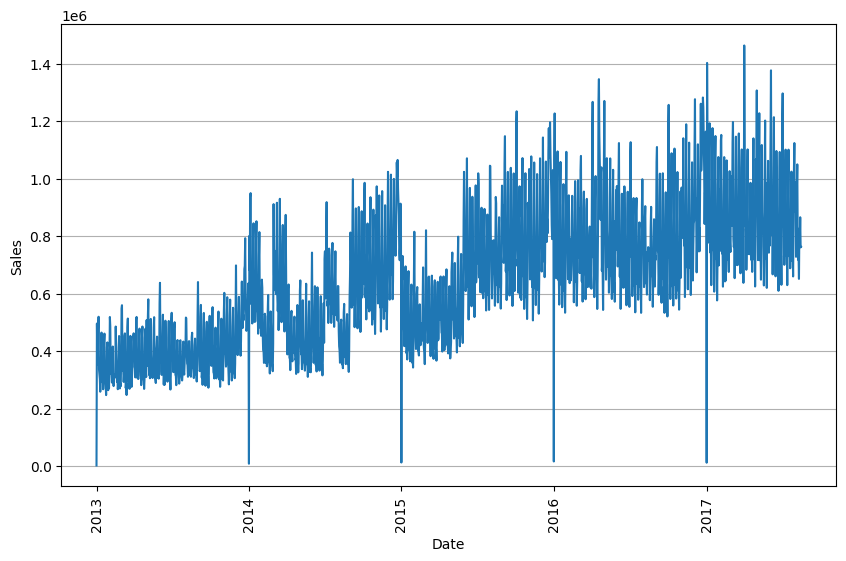

In [21]:
# Check the plot

plt.figure(figsize=(10, 6))
plt.plot(train_base["sales"])
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

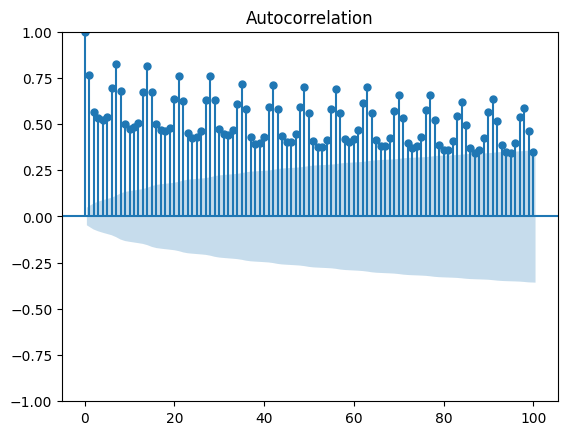

In [25]:
# ACF

acf_plot = plot_acf(train_base.sales, lags = 100)

c:\Users\James\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


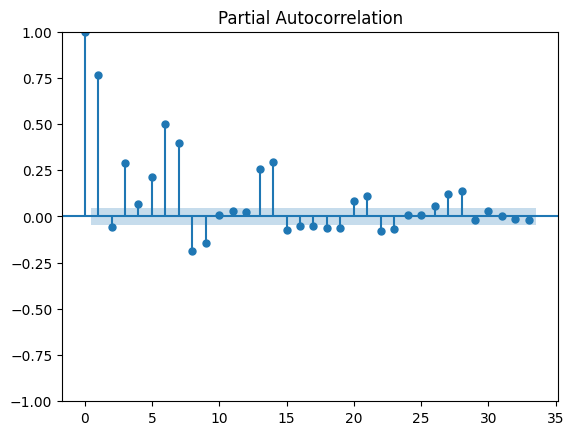

In [26]:
# PACF

pacf_plot = plot_pacf(train_base.sales)